**Tarea de:Training Pipeline: From data to model**

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [175]:
data = pd.read_csv("/content/drive/MyDrive/survey_lung_cancer.csv")

In [176]:
data


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


**Análisis Exploratorio**

In [177]:
#Ver cantidad de valores no nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [178]:
#Ver los datos del dataset
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [179]:
#Revisamos la cantidad de valores únicos en el dataframe
for col in data.columns:
    print(f"\n{col}\n")
    print(data[col].value_counts())


GENDER

GENDER
M    162
F    147
Name: count, dtype: int64

AGE

AGE
64    20
56    19
63    19
62    18
60    17
61    16
59    15
70    15
58    13
67    13
55    11
69    11
72    10
71    10
57     9
68     9
77     9
54     8
51     8
65     7
74     6
75     5
52     4
47     4
73     4
66     4
53     4
76     4
49     3
48     2
44     2
81     2
78     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64

SMOKING

SMOKING
2    174
1    135
Name: count, dtype: int64

YELLOW_FINGERS

YELLOW_FINGERS
2    176
1    133
Name: count, dtype: int64

ANXIETY

ANXIETY
1    155
2    154
Name: count, dtype: int64

PEER_PRESSURE

PEER_PRESSURE
2    155
1    154
Name: count, dtype: int64

CHRONIC DISEASE

CHRONIC DISEASE
2    156
1    153
Name: count, dtype: int64

FATIGUE 

FATIGUE 
2    208
1    101
Name: count, dtype: int64

ALLERGY 

ALLERGY 
2    172
1    137
Name: count, dtype: int64

WHEEZING

WHEEZING
2    172
1    137
Name: count, dtype: int64

ALCOHOL 

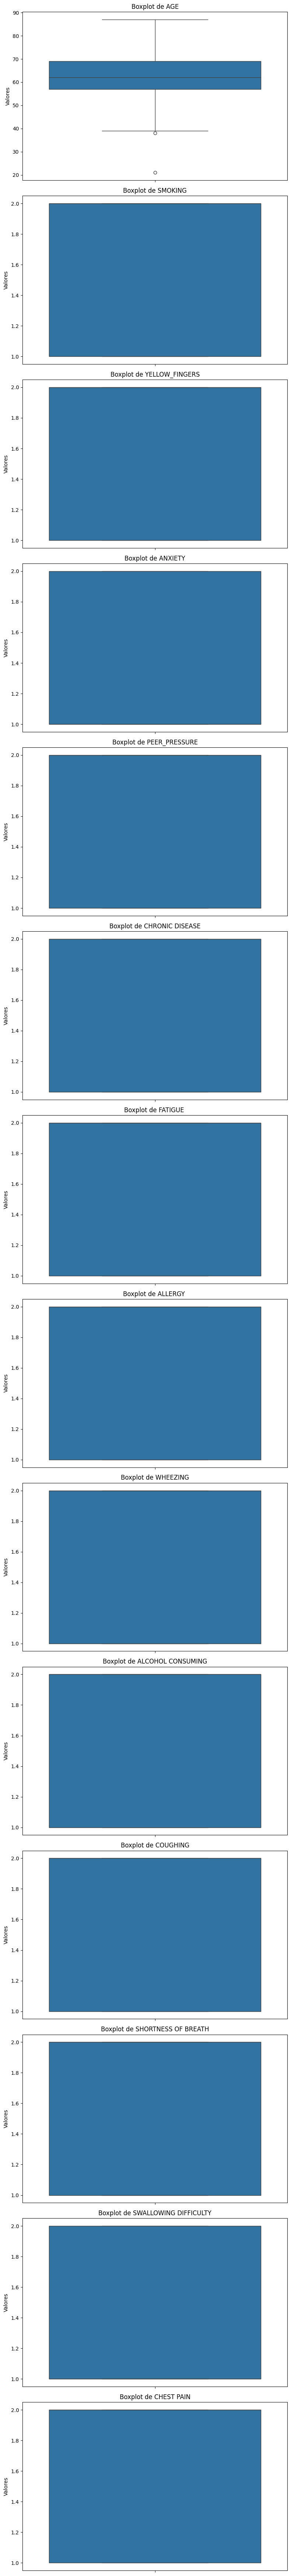

In [180]:
# Seleccionamos solo las columnas numéricas
numeric_columns = data.select_dtypes(include=['number']).columns

# Creamos diagramas de caja individuales para cada columna numérica
num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, 5 * num_cols))

if num_cols == 1:
    axes = [axes]

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].set_ylabel("Valores")

plt.tight_layout()
plt.show()


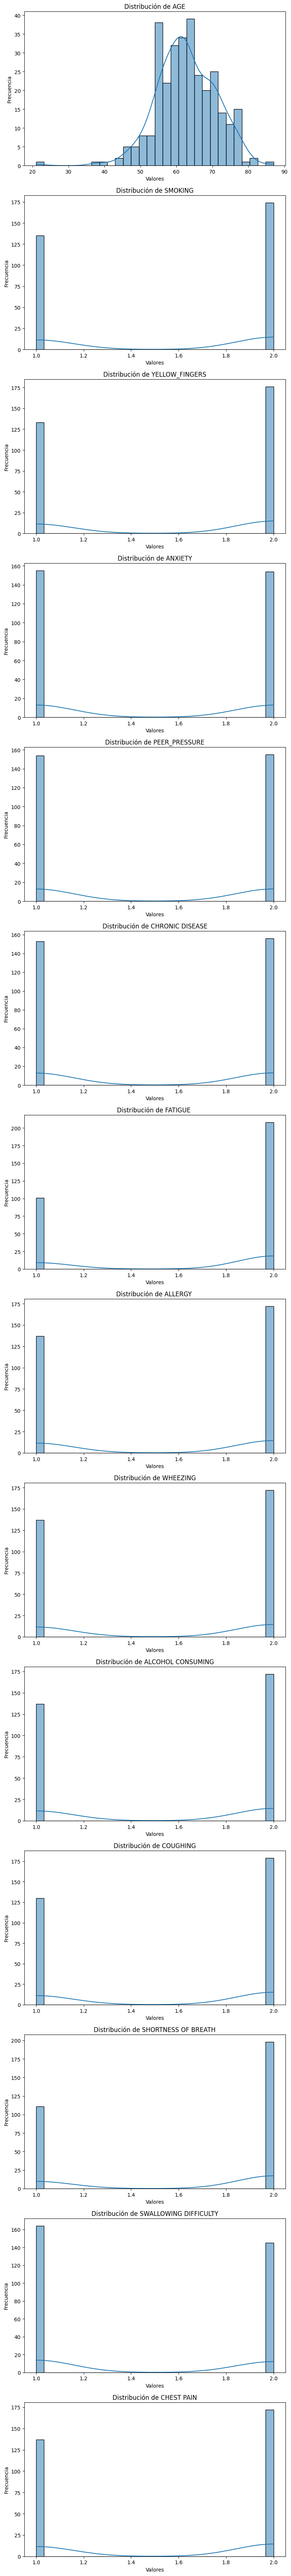

In [181]:
#Hacemps más análisis exploratorio
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, 5 * num_cols))

if num_cols == 1:
    axes = [axes]

for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel("Valores")
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


**Limpieza de datos**

In [182]:
# Función para eliminar outliers en la columna AGE usando el método del rango intercuartílico (IQR)
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Elimina mosoutliers solo en la columna AGE
data = remove_outliers_iqr(data, "AGE")


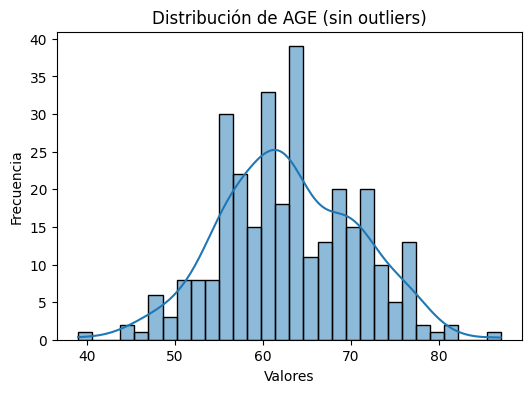

In [183]:
plt.figure(figsize=(6, 4))
sns.histplot(data["AGE"], kde=True, bins=30)
plt.title("Distribución de AGE (sin outliers)")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()


**División de Dataset**

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [185]:
#Procedemos a dividir la data, en este caso vamos a partir 70% para el train_data, 20% para la val_data y 10% para la test data
train_data, temp_data = train_test_split(data, train_size=0.70, random_state=9, stratify=data[["SMOKING", "LUNG_CANCER"]])


In [186]:
len(data)

307

In [187]:
len(train_data)

214

In [188]:
len(data), len(train_data)

(307, 214)

In [ ]:
# Busco el porcentaje para colocar
#en este caso seria 0.2/0.3=0.66666

In [189]:
val_data, test_data= train_test_split(temp_data, train_size=0.66666, random_state=9, stratify=temp_data[["SMOKING", "LUNG_CANCER"]])

In [190]:
len(data), len(train_data), len(test_data), len(val_data)

(307, 214, 32, 61)



**Con en dataset de entrenamiento realiza encoding de las variables categóricas (llama a la función fit_transform del encoder, o la función fit primero y luego transform).**


In [191]:
column_names = train_data.columns.tolist()


In [192]:
train_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
53,M,49,2,1,1,2,2,2,2,2,2,2,2,2,2,YES
271,M,63,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
20,F,44,2,2,2,2,2,2,1,1,1,1,2,2,1,YES
108,F,49,1,1,1,2,2,1,2,1,2,2,2,1,1,YES
109,M,53,1,1,1,1,2,2,2,1,2,1,2,1,2,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,F,72,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
185,M,77,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
122,M,57,2,1,2,1,2,2,1,1,1,1,2,1,1,YES
159,M,68,1,1,2,2,2,1,1,1,2,1,1,1,1,NO


In [193]:
column_names

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

In [194]:
train_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
53,M,49,2,1,1,2,2,2,2,2,2,2,2,2,2,YES
271,M,63,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
20,F,44,2,2,2,2,2,2,1,1,1,1,2,2,1,YES
108,F,49,1,1,1,2,2,1,2,1,2,2,2,1,1,YES
109,M,53,1,1,1,1,2,2,2,1,2,1,2,1,2,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,F,72,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
185,M,77,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
122,M,57,2,1,2,1,2,2,1,1,1,1,2,1,1,YES
159,M,68,1,1,2,2,2,1,1,1,2,1,1,1,1,NO


**Se realiza en encode a las variables**

In [195]:
train_data["GENDER"].value_counts()

,count
GENDER,
M,122
F,92


In [196]:
train_data["LUNG_CANCER"].value_counts()

,count
LUNG_CANCER,
YES,187
NO,27


In [197]:
from sklearn.preprocessing import LabelEncoder

# Codificador para GENDER
le_gender = LabelEncoder()
train_data['GENDER'] = le_gender.fit_transform(train_data['GENDER'])

# Codificador para LUNG_CANCER
le_lung = LabelEncoder()
train_data['LUNG_CANCER'] = le_lung.fit_transform(train_data['LUNG_CANCER'])


In [198]:
val_data['GENDER'] = le_gender.transform(val_data['GENDER'])
test_data['GENDER'] = le_gender.transform(test_data['GENDER'])
val_data['LUNG_CANCER'] = le_lung.transform(val_data['LUNG_CANCER'])
test_data['LUNG_CANCER'] = le_lung.transform(test_data['LUNG_CANCER'])


In [199]:
train_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
53,1,49,2,1,1,2,2,2,2,2,2,2,2,2,2,1
271,1,63,2,1,1,1,1,2,2,2,2,2,2,1,2,1
20,0,44,2,2,2,2,2,2,1,1,1,1,2,2,1,1
108,0,49,1,1,1,2,2,1,2,1,2,2,2,1,1,1
109,1,53,1,1,1,1,2,2,2,1,2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0,72,2,2,2,2,1,2,1,2,1,2,2,2,1,1
185,1,77,2,1,1,1,1,1,2,2,2,2,1,1,1,1
122,1,57,2,1,2,1,2,2,1,1,1,1,2,1,1,1
159,1,68,1,1,2,2,2,1,1,1,2,1,1,1,1,0


In [200]:
#1 es yes y 0 es No
train_data["LUNG_CANCER"].value_counts()

,count
LUNG_CANCER,
1,187
0,27


In [201]:
#1 es masculino y 0 es femenino
train_data["GENDER"].value_counts()

,count
GENDER,
1,122
0,92


**Como las clases están desbalanceadas se realiza SMOTE**

In [202]:
from imblearn.over_sampling import SMOTE
smote_sampler = SMOTE(sampling_strategy=0.5)

In [203]:
smote_resampled_data = smote_sampler.fit_resample(
    X=train_data[["GENDER","AGE", "SMOKING", "YELLOW_FINGERS", "ANXIETY","PEER_PRESSURE","CHRONIC DISEASE","FATIGUE ","ALLERGY ", "WHEEZING","ALCOHOL CONSUMING","COUGHING","SHORTNESS OF BREATH","SWALLOWING DIFFICULTY","CHEST PAIN"]],
    y=train_data["LUNG_CANCER"]
)

In [204]:
len(smote_resampled_data), type(smote_resampled_data)

(2, tuple)

In [205]:
smote_resampled_features = smote_resampled_data[0]
smote_resampled_target = smote_resampled_data[1]

In [206]:
#1 ES YES Y 0 ES NO
smote_resampled_target.value_counts()

,count
LUNG_CANCER,
1,187
0,93


In [207]:
smote_resampled_features

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,49,2,1,1,2,2,2,2,2,2,2,2,2,2
1,1,63,2,1,1,1,1,2,2,2,2,2,2,1,2
2,0,44,2,2,2,2,2,2,1,1,1,1,2,2,1
3,0,49,1,1,1,2,2,1,2,1,2,2,2,1,1
4,1,53,1,1,1,1,2,2,2,1,2,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,55,2,1,1,1,1,1,1,1,1,1,1,1,2
276,1,63,2,1,1,1,1,1,1,1,1,2,1,1,1
277,0,59,1,1,1,1,1,1,1,1,1,1,1,1,2
278,0,69,1,1,1,1,1,2,1,1,1,1,2,1,1


**Decision tree 1**

In [208]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [209]:
model = DecisionTreeClassifier()

In [210]:
model.fit(X=smote_resampled_features[["GENDER", "SMOKING"]], y=smote_resampled_target)

DecisionTreeClassifier()

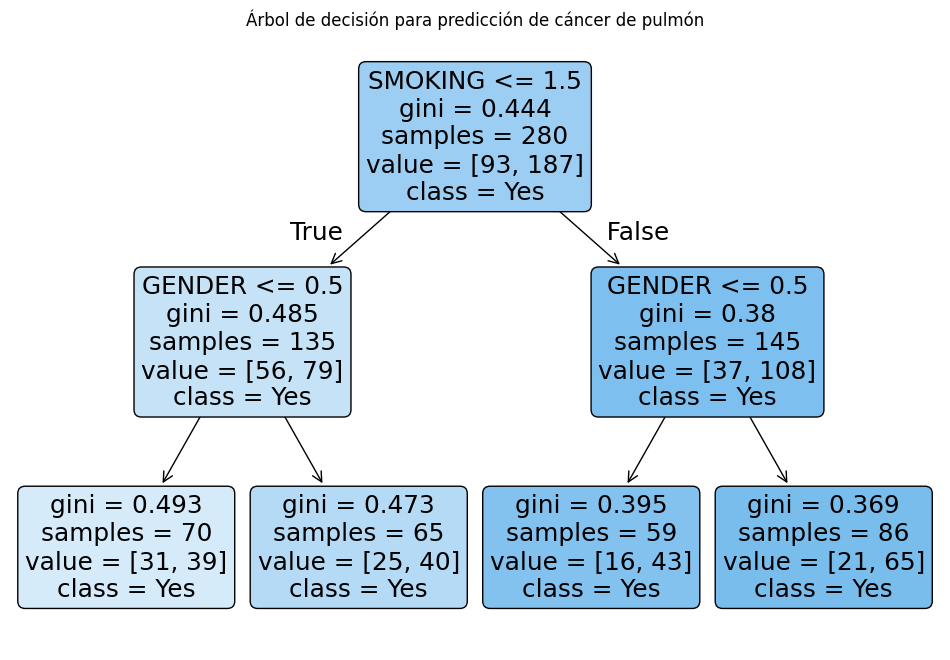

In [211]:
plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=["GENDER", "SMOKING"],  # Las columnas que usamos para entrenar
    class_names=["No", "Yes"],            # Asumiendo que 0 = No, 1 = Yes
    filled=True,
    rounded=True
)
plt.title("Árbol de decisión para predicción de cáncer de pulmón")
plt.show()


In [213]:
predicted_prob = model.predict_proba(smote_resampled_features[["GENDER", "SMOKING"]])

In [214]:
predicted_class = model.predict(smote_resampled_features[["GENDER", "SMOKING"]])

In [215]:
data_and_predictions1 = smote_resampled_features.copy()

# Agregamos las predicciones de clase (0 o 1)
data_and_predictions1["predicted_class"] = predicted_class

# Agregamos las probabilidades:
# [:, 0] es la probabilidad de clase 0 → No tiene cáncer
# [:, 1] es la probabilidad de clase 1 → Sí tiene cáncer
data_and_predictions1["predicted_prob(No cancer)"] = predicted_prob[:, 0]
data_and_predictions1["predicted_prob(Yes cancer)"] = predicted_prob[:, 1]


In [216]:
data_and_predictions1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,predicted_class,predicted_prob(No cancer),predicted_prob(Yes cancer)
0,1,49,2,1,1,2,2,2,2,2,2,2,2,2,2,1,0.244186,0.755814
1,1,63,2,1,1,1,1,2,2,2,2,2,2,1,2,1,0.244186,0.755814
2,0,44,2,2,2,2,2,2,1,1,1,1,2,2,1,1,0.271186,0.728814
3,0,49,1,1,1,2,2,1,2,1,2,2,2,1,1,1,0.442857,0.557143
4,1,53,1,1,1,1,2,2,2,1,2,1,2,1,2,1,0.384615,0.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,55,2,1,1,1,1,1,1,1,1,1,1,1,2,1,0.271186,0.728814
276,1,63,2,1,1,1,1,1,1,1,1,2,1,1,1,1,0.244186,0.755814
277,0,59,1,1,1,1,1,1,1,1,1,1,1,1,2,1,0.442857,0.557143
278,0,69,1,1,1,1,1,2,1,1,1,1,2,1,1,1,0.442857,0.557143


In [217]:
data_and_predictions1["LUNG_CANCER"] = smote_resampled_target


In [218]:
data_and_predictions1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,predicted_class,predicted_prob(No cancer),predicted_prob(Yes cancer),LUNG_CANCER
0,1,49,2,1,1,2,2,2,2,2,2,2,2,2,2,1,0.244186,0.755814,1
1,1,63,2,1,1,1,1,2,2,2,2,2,2,1,2,1,0.244186,0.755814,1
2,0,44,2,2,2,2,2,2,1,1,1,1,2,2,1,1,0.271186,0.728814,1
3,0,49,1,1,1,2,2,1,2,1,2,2,2,1,1,1,0.442857,0.557143,1
4,1,53,1,1,1,1,2,2,2,1,2,1,2,1,2,1,0.384615,0.615385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,55,2,1,1,1,1,1,1,1,1,1,1,1,2,1,0.271186,0.728814,0
276,1,63,2,1,1,1,1,1,1,1,1,2,1,1,1,1,0.244186,0.755814,0
277,0,59,1,1,1,1,1,1,1,1,1,1,1,1,2,1,0.442857,0.557143,0
278,0,69,1,1,1,1,1,2,1,1,1,1,2,1,1,1,0.442857,0.557143,0


In [219]:
def calculate_accuracy(predictions):
    number_of_hits = (predictions["LUNG_CANCER"] == predictions["predicted_class"]).sum()
    number_of_predictions = len(predictions)

    accuracy = round(number_of_hits/number_of_predictions*100, 2)
    accuracy = float(accuracy)

    return accuracy

In [220]:
calculate_accuracy(data_and_predictions1)

66.79

Como se puede observar el accuracy es bajo

**Decision tree 2**

In [221]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [222]:
model = DecisionTreeClassifier()

In [223]:
model.fit(X=smote_resampled_features[["GENDER", "SMOKING","ANXIETY","PEER_PRESSURE","ALCOHOL CONSUMING"]], y=smote_resampled_target)

DecisionTreeClassifier()

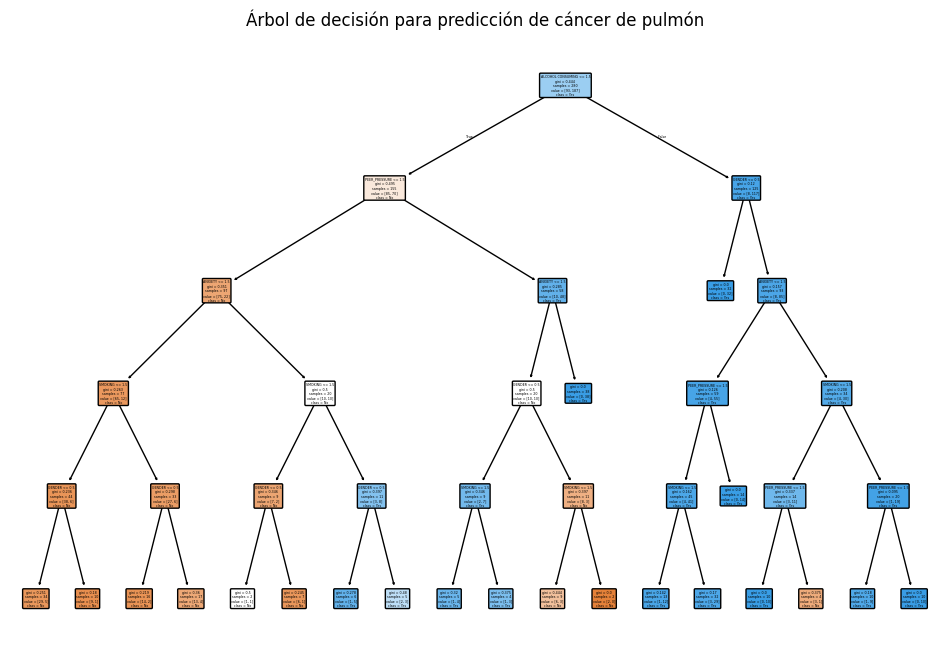

In [224]:
plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=["GENDER", "SMOKING","ANXIETY","PEER_PRESSURE","ALCOHOL CONSUMING"],  # Las columnas que usamos para entrenar
    class_names=["No", "Yes"],            # Asumiendo que 0 = No, 1 = Yes
    filled=True,
    rounded=True
)
plt.title("Árbol de decisión para predicción de cáncer de pulmón")
plt.show()


In [225]:
predicted_prob = model.predict_proba(smote_resampled_features[["GENDER", "SMOKING","ANXIETY","PEER_PRESSURE","ALCOHOL CONSUMING"]])

In [226]:
predicted_class = model.predict(smote_resampled_features[["GENDER", "SMOKING","ANXIETY","PEER_PRESSURE","ALCOHOL CONSUMING"]])

In [227]:
data_and_predictions1 = smote_resampled_features.copy()

# Agregamos las predicciones de clase (0 o 1)
data_and_predictions1["predicted_class"] = predicted_class

# Agregamos las probabilidades:
# [:, 0] es la probabilidad de clase 0 → No tiene cáncer
# [:, 1] es la probabilidad de clase 1 → Sí tiene cáncer
data_and_predictions1["predicted_prob(No cancer)"] = predicted_prob[:, 0]
data_and_predictions1["predicted_prob(Yes cancer)"] = predicted_prob[:, 1]


In [228]:
data_and_predictions1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,predicted_class,predicted_prob(No cancer),predicted_prob(Yes cancer)
0,1,49,2,1,1,2,2,2,2,2,2,2,2,2,2,1,0.000000,1.000000
1,1,63,2,1,1,1,1,2,2,2,2,2,2,1,2,1,0.093750,0.906250
2,0,44,2,2,2,2,2,2,1,1,1,1,2,2,1,1,0.000000,1.000000
3,0,49,1,1,1,2,2,1,2,1,2,2,2,1,1,1,0.000000,1.000000
4,1,53,1,1,1,1,2,2,2,1,2,1,2,1,2,1,0.076923,0.923077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,55,2,1,1,1,1,1,1,1,1,1,1,1,2,0,0.875000,0.125000
276,1,63,2,1,1,1,1,1,1,1,1,2,1,1,1,0,0.764706,0.235294
277,0,59,1,1,1,1,1,1,1,1,1,1,1,1,2,0,0.852941,0.147059
278,0,69,1,1,1,1,1,2,1,1,1,1,2,1,1,0,0.852941,0.147059


In [229]:
data_and_predictions1["LUNG_CANCER"] = smote_resampled_target


In [230]:
data_and_predictions1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,predicted_class,predicted_prob(No cancer),predicted_prob(Yes cancer),LUNG_CANCER
0,1,49,2,1,1,2,2,2,2,2,2,2,2,2,2,1,0.000000,1.000000,1
1,1,63,2,1,1,1,1,2,2,2,2,2,2,1,2,1,0.093750,0.906250,1
2,0,44,2,2,2,2,2,2,1,1,1,1,2,2,1,1,0.000000,1.000000,1
3,0,49,1,1,1,2,2,1,2,1,2,2,2,1,1,1,0.000000,1.000000,1
4,1,53,1,1,1,1,2,2,2,1,2,1,2,1,2,1,0.076923,0.923077,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,55,2,1,1,1,1,1,1,1,1,1,1,1,2,0,0.875000,0.125000,0
276,1,63,2,1,1,1,1,1,1,1,1,2,1,1,1,0,0.764706,0.235294,0
277,0,59,1,1,1,1,1,1,1,1,1,1,1,1,2,0,0.852941,0.147059,0
278,0,69,1,1,1,1,1,2,1,1,1,1,2,1,1,0,0.852941,0.147059,0


In [231]:
calculate_accuracy(data_and_predictions1)

90.0

**Decision tree 3**

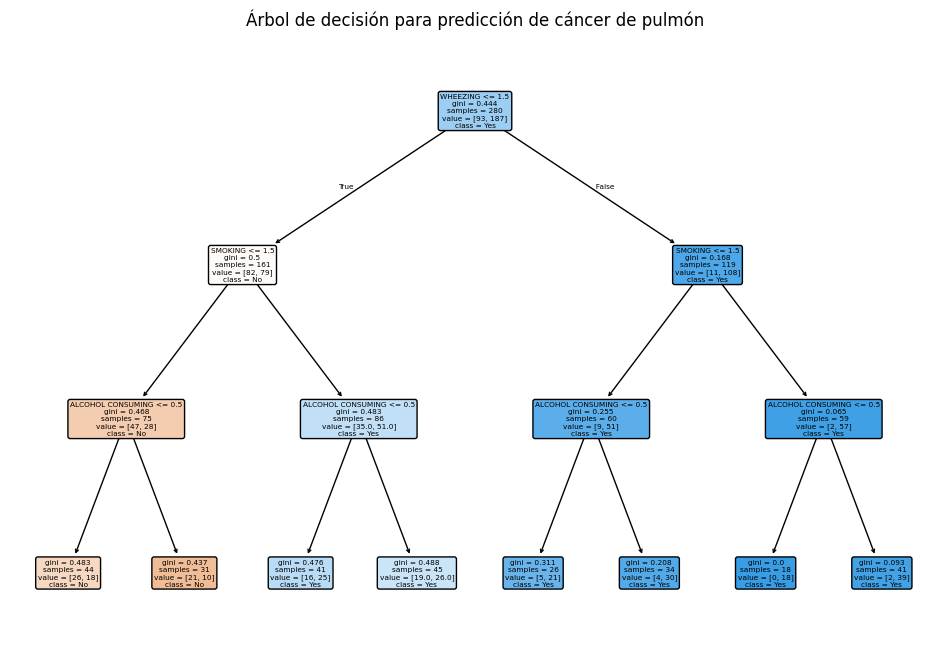

In [232]:
model = DecisionTreeClassifier()
model.fit(X=smote_resampled_features[["GENDER", "SMOKING","WHEEZING"]], y=smote_resampled_target)
plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=["ALCOHOL CONSUMING", "SMOKING", "WHEEZING"],  # Las columnas que usamos para entrenar
    class_names=["No", "Yes"],            # Asumiendo que 0 = No, 1 = Yes
    filled=True,
    rounded=True
)
plt.title("Árbol de decisión para predicción de cáncer de pulmón")
plt.show()


In [233]:
predicted_prob = model.predict_proba(smote_resampled_features[["GENDER", "SMOKING", "WHEEZING"]])
predicted_class = model.predict(smote_resampled_features[["GENDER", "SMOKING","WHEEZING"]])
data_and_predictions1 = smote_resampled_features.copy()

# Agregamos las predicciones de clase (0 o 1)
data_and_predictions1["predicted_class"] = predicted_class

# Agregamos las probabilidades:
# [:, 0] es la probabilidad de clase 0 → No tiene cáncer
# [:, 1] es la probabilidad de clase 1 → Sí tiene cáncer
data_and_predictions1["predicted_prob(No cancer)"] = predicted_prob[:, 0]
data_and_predictions1["predicted_prob(Yes cancer)"] = predicted_prob[:, 1]

In [234]:
data_and_predictions1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,predicted_class,predicted_prob(No cancer),predicted_prob(Yes cancer)
0,1,49,2,1,1,2,2,2,2,2,2,2,2,2,2,1,0.048780,0.951220
1,1,63,2,1,1,1,1,2,2,2,2,2,2,1,2,1,0.048780,0.951220
2,0,44,2,2,2,2,2,2,1,1,1,1,2,2,1,1,0.390244,0.609756
3,0,49,1,1,1,2,2,1,2,1,2,2,2,1,1,0,0.590909,0.409091
4,1,53,1,1,1,1,2,2,2,1,2,1,2,1,2,0,0.677419,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,55,2,1,1,1,1,1,1,1,1,1,1,1,2,1,0.390244,0.609756
276,1,63,2,1,1,1,1,1,1,1,1,2,1,1,1,1,0.422222,0.577778
277,0,59,1,1,1,1,1,1,1,1,1,1,1,1,2,0,0.590909,0.409091
278,0,69,1,1,1,1,1,2,1,1,1,1,2,1,1,0,0.590909,0.409091


In [235]:
data_and_predictions1["LUNG_CANCER"] = smote_resampled_target


In [236]:
data_and_predictions1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,predicted_class,predicted_prob(No cancer),predicted_prob(Yes cancer),LUNG_CANCER
0,1,49,2,1,1,2,2,2,2,2,2,2,2,2,2,1,0.048780,0.951220,1
1,1,63,2,1,1,1,1,2,2,2,2,2,2,1,2,1,0.048780,0.951220,1
2,0,44,2,2,2,2,2,2,1,1,1,1,2,2,1,1,0.390244,0.609756,1
3,0,49,1,1,1,2,2,1,2,1,2,2,2,1,1,0,0.590909,0.409091,1
4,1,53,1,1,1,1,2,2,2,1,2,1,2,1,2,0,0.677419,0.322581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,55,2,1,1,1,1,1,1,1,1,1,1,1,2,1,0.390244,0.609756,0
276,1,63,2,1,1,1,1,1,1,1,1,2,1,1,1,1,0.422222,0.577778,0
277,0,59,1,1,1,1,1,1,1,1,1,1,1,1,2,0,0.590909,0.409091,0
278,0,69,1,1,1,1,1,2,1,1,1,1,2,1,1,0,0.590909,0.409091,0


In [237]:
calculate_accuracy(data_and_predictions1)

73.57